# **AM 207**: Homework 1

Verena Kaynig-Fittkau and Pavlos Protopapas  <br>
**Due: 11.59 P.M. Thursday February 18th, 2015**

### Instructions:

+ Upload your answers in an ipython notebook to Canvas.

+ We will provide you imports for your ipython notebook. Please do not import additional libraries.

+ Your individual submissions should use the following filenames: AM207_YOURNAME_HW1.ipynb

+ Your code should be in code cells as part of your ipython notebook. Do not use a different language (or format). 

+ **Do not just send your code. The homework solutions should be in a report style. Be sure to add comments to your code as well as markdown cells where you describe your approach and discuss your results. **

+ Please submit your notebook in an **executed** status, so that we can see all the results you computed. However, we will still run your code and all cells should reproduce the output when executed. 

+ If you have multiple files (e.g. you've added code files or images) create a tarball for all files in a single file and name it: AM207_YOURNAME_HW1.tar.gz or AM207_YOURNAME_HW1.zip


### Have Fun!
_ _ _ _ _

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats 

/Users/xdai/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Problem 1: By a Needles Length

![Alt Buffon Needle](figures/Buffon_needle.gif)
We discussed how to use Buffon's needle to estimate $\pi$ during lecture, using the probability of the needle crossing a line of a floor tile. Using Monte Carlo simulation, estimate the probability of the needle crossing a floor line as a function of the needle's length. Assume that the distance between floor lines is 1 unit, and your needle manufacturer provides you with needles of different length in 0.1 increments with a maximum length of 1 unit. Plot a histogram of your results and compare your results to the analytical solution from the lecture:
$$P = \frac{2 \cdot l}{t \cdot \pi}$$

where $l$ is the length of the needle and $t$ is the distance beweent the floor tiles

In a next step extend your simulation to a maximum needle length of 2 units, still using 0.1 increments. Compare your results to the same formula for the intersection. Why do your results now diverge from the analytical solution given above? What would you need to do to correct the analytical formula? It is ok to just describe the integral you need to solve analytically, and why it looks this way. No need to actually do the integration by hand. 

**Please answer this problem by adding cells here.**

In [2]:
def analytical(l):
    return (2*l)/np.pi

In [3]:
def do_estimations(l):
    pi = 3.141592
    #Here I need to do simulations for all possible length of needles
    #upper and lower limits for angle
    a = 0.0
    b = pi/2
    #central point of the needle to the wall
    c = 0.5
    #size 
    N = 1000.0
    #create a list to store probs
    ana = []
    err_mean=[]
    err_std=[]
    plt.figure()
    for needle in l:
        probs = []
        for x in range(500):
            #draw many sample from uniform distribution 
            dist = np.random.uniform(low=a,high=c,size=N);
            angles = np.random.uniform(low=a, high=b,size = N)
            probs.append(np.sum(dist/np.sin(angles) <= (needle/2))/N)
        #figure out the error/mean
        err_std.append(np.std(probs))
        err_mean.append(np.mean(probs))
        ana.append(analytical(needle))
    ax = sns.barplot(l,err_mean,yerr=err_std,alpha=.5,palette="Blues_d")
    ax.set(xlabel='length', ylabel='Probability',title='Error Bars for the Probabilities')
    plt.scatter(l*10,ana,color='r',s=40)

/Users/xdai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/xdai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


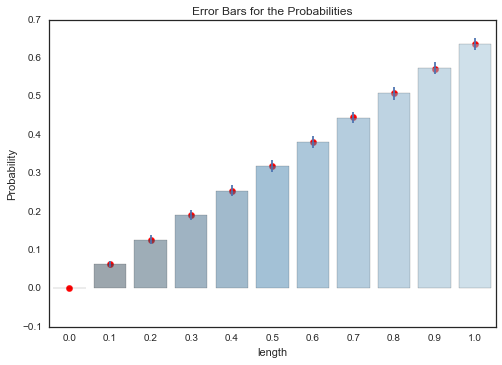

In [4]:
l = np.arange(0,1.1,0.1)
do_estimations(l)


/Users/xdai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/xdai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


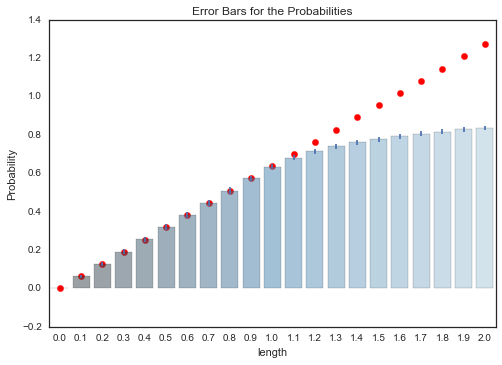

In [5]:
l = np.arange(0,2.1,0.1)
do_estimations(l)

### Conclusion

As what have shown in plots above, the result diverges after the length of needle becomes larger than unit, which means the analytical formula obtained before doesn't apply to this case anymore


Suppose a long needle <math>l > t</math>. In this case, integrating the joint probability density function, we obtain:

$\int_{\theta=0}^{\frac{\pi}{2}} \int_{x=0}^{m(\theta)}  \frac{4}{t\pi}\,dx\,d\theta $

where $m(\theta) $is the minimum between
$(l/2)\sin\theta$ and $t/2 $.




# Problem 2: Simple Integration

Write a function that estimates the value of a given one dimensional integral Monte Carlo style. 
The function should have the following signature:

`estimate_integral_MC(function_to_integrate, lower_bound, upper_bound, number_of_samples, number_of_tries)`

Where `number_of_tries` is used to calculate the standard deviation of the estimated value of the integral. 

Test your function by solving the following integrals:

* $ \int_0^3 x^{\frac{x}{4}} \,dx$
* $ \int_0^1 \log x \cdot \log(1-x) \,dx $.


**Please answer this problem by adding cells here.**

In [6]:
def estimate_integral_MC(inte_fun, lower_bound, upper_bound, n_samples, n_tries):
    estimates = np.zeros(n_tries)
    for i in range(n_tries):
        #1. N values uniformly drawn from lower to upper 
        X = np.random.uniform(low=lower_bound, high=upper_bound, size=n_samples) 
        #2. Compute f(X) and its average
        Y = inte_fun(X)
        f_average = np.sum(Y)/ n_samples
        #3. estimate value of integral
        estimates[i]=(upper_bound-lower_bound) * f_average;
    ax = sns.distplot(estimates,color="y",kde=False)
    ax.set(xlabel='Integral', ylabel='Frequency',title='Integration Calculation')
    print "Monte Carlo estimate = ",np.mean(estimates)
    print "Monte Carlo Standard Deviation",np.std(estimates)

Monte Carlo estimate =  3.91539277645
Monte Carlo Standard Deviation 0.00370167700901


/Users/xdai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


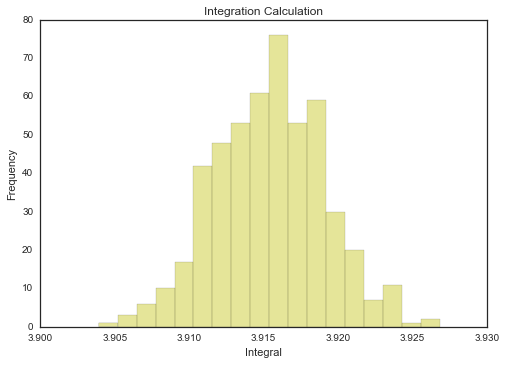

In [7]:
def first_inte(x):
    return x**(x/4);
def second_inte(x):
    return np.log(x) * np.log(1-x)

#By using what we have learned in the class-mean value theorem, we could solve this problem easily
estimate_integral_MC(first_inte,0,3,100000.0,500)

Monte Carlo estimate =  0.355031951421
Monte Carlo Standard Deviation 0.000415366316077


/Users/xdai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


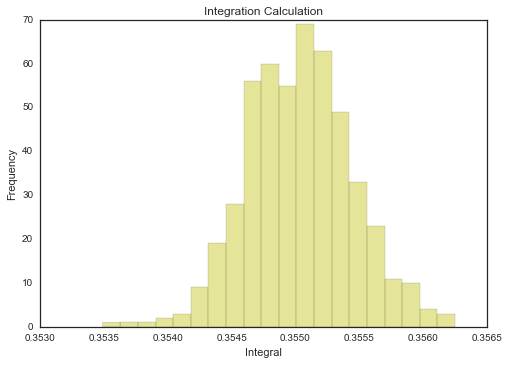

In [8]:
estimate_integral_MC(second_inte,0,1,100000.0,500)

# Problem 3: The Donut Estimation

You bought a nice donut for yourself and decided to eat it in the evening while working on your AM207 assignments. 
Unfortunately you live in a shared apartment and your roommate got hold of the donut in the kitchen. It seems that he first
cut off a small piece from the bottom, but then discovered how delicious the donut was and proceeded to cut off an additional large part. Discovering the donut theft in the evening you decide to confront your roommate, but you want to present hard facts and estimate how much of your original donut was left. 

Think of the donut as a 3D object(refer to the following picture). You model the donut as a torus centered at the origin`(0,0,0)` with outer radius `R=4` and inner radius `r=2`. Points $(x,y,z)$ inside the torus then are described by the following condition: 
$$z^2 + (\sqrt{x^2 + y^2} - c)^2 \leq a^2,$$
where $c$ is the radius from origin to the center of the torus tube, and $a$ is the radius of the donut tube, the cross section of the donut tube is a circle.

Your roomates cuts were first parallel to the x axis at y = -3, and then parallel to the y axis at x = 1.

To estimate the weight of the donut you need to solve the integral

$$ \int_V \rho \,dx \,dy \,dz $$.

Where $\rho$ is the density of the donut and $V$ is the volume. As you are just interested in the percentage of the whole donut you got to eat, you can just assume $\rho=1$.

The weight of the whole original donut then was:

$$ (\pi a^2)\cdot(2 \cdot \pi \cdot c) $$

What is the percentage of the donut your room mate left for you to eat? Don't forget to estimate the error as well!




**Please answer this problem by adding cells here.**

The mean of the percentage of donut left: 0.540212657142
The standard deviation of  simulations 0.00613349659042


/Users/xdai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/xdai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/xdai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


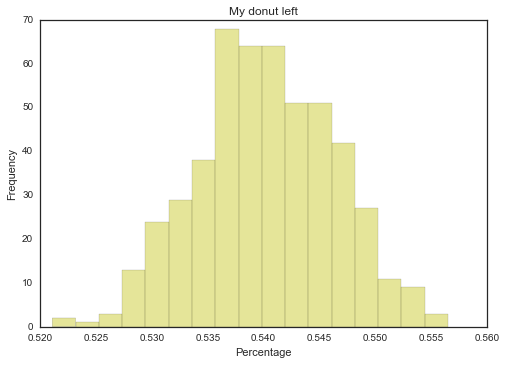

In [9]:
pi = 3.141592
a = 1
c = 3
# take the integral, x = -4, 1 y = -3 , 4 z= -1,1
N = 10000.0
perc = np.zeros(500)
for i in range(500):
    x = np.random.uniform(low=-4, high=1, size=N) 
    y = np.random.uniform(low=-3, high=4, size=N) 
    z = np.random.uniform(low=-1, high=1, size=N) 
    #to claculate the volumn, first I check the propability of getting into the donut
    prob = np.sum((np.sqrt((x**2)+(y**2)) - c)**2.0 + z**2 <= 1)/N
    #the volumn of the box we do sampling
    v_sample = 5*7*2
    #the volumn of the donut is 
    v_donut = prob * v_sample
    #calculate the percentage of the current donut/ 
    v_orig = pi * ((a)**2) * 2 * pi * c
    perc[i] = (v_donut/v_orig)
print "The mean of the percentage of donut left:", np.mean(perc)
print "The standard deviation of  simulations", np.std(perc)
ax = sns.distplot(perc,color="y",kde=False)
ax.set(xlabel='Percentage', ylabel='Frequency',title='My donut left')

# Problem 4: New Years Resolutions

A lot of people pledge to get more active in the new year. Unfortunately these resolutions often are short lived. We model the probability distribution of personal fitness over the months of a year with a skewed distribution:

$ P(t) = \lambda \frac{(t-0.9)}{(t-1)^2 + 1}, \; 1 \leq t \leq 12 $

$ P(t) = 0 \; otherwise$

Where $t=1$ corresponds to January, $t=2$ corresponds to February, etc.. $\lambda$ is a normalization constant, and t is measured in months ($t$ only takes integer values). 

* Plot the given distribution and compute the normalization factor
* Sample $10^5$ samples from the distribution given above using rejection sampling. 
* Plot the histogram of the simulated samples and compare it to the true distribution (hint: It's easiest to use the normalization factor computed above and then plot the normed version of the histogram against it.
* Repeat the first two steps using the inverse transform instead of rejection sampling. Do not bother with getting the anti-derivative analytically. Just build a lookup table for it. 
* Compare the execution time of both methods. Which one is faster and why? When would you prefer a lookup table and when an analytical solution to the anti-derivative?

**Please answer this problem by adding cells here.**

In [10]:
def pdf_p_norm(t,norm=1):
    return norm * ((t-0.9)/((t-1)**2 + 1))

The normalization factor is 0.39203851592


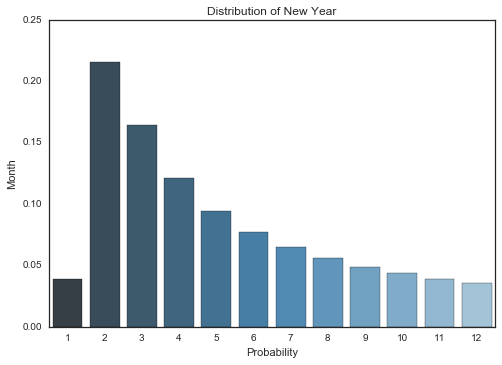

In [13]:
#plot the given distribution
t = np.arange(1,13)#arange doesn't include the last number
res = np.zeros(12)
norm = 1/np.sum(pdf_p_norm(t))
print "The normalization factor is", norm
res = pdf_p_norm(t,norm)
ax = sns.barplot(t,res,palette="Blues_d")
ax.set(xlabel='Probability', ylabel='Month',title='Distribution of New Year')


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
Total samples drawn:  300504
Number of accepted samples:  100000


[(0, 0.25),

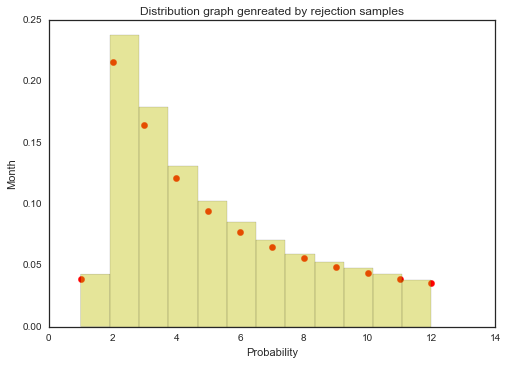

In [38]:
#part2: sample 10^5 from distribution given
%time
N = 10 ** 5#sample size
samples = np.zeros(N)
count = 0
accepted = 0
while(accepted < N):
    t = np.random.random_integers(1,12)
    y = np.random.uniform(0,0.25)
    if (y < pdf_p_norm(t,norm)):
        samples[accepted] = t
        accepted += 1
    count += 1
print "Total samples drawn: ",count
print "Number of accepted samples: ", accepted
# get the histogram info
hinfo = np.histogram(samples,30)
#make plots
ax = sns.distplot(samples,color='y',bins=12,kde=False,norm_hist=True)
plt.scatter(np.arange(1,13),res,color='r',s=40)
ax.set(xlabel='Probability', ylabel='Month',title='Distribution graph genreated by rejection samples',ylim=(0,0.25))

In [39]:
#Here I use the inverse transform
#first we nned to find cdf F(x)
#build a look up table for cdf
month = np.arange(1,13)
probs = pdf_p_norm(month,norm)
cdf = np.zeros(12)
cdf[0] = probs[0]
for i in range(1,12):
    cdf[i] = probs[i] + cdf[i-1];
print cdf

[ 0.03920385  0.25482504  0.41948121  0.54101315  0.63556362  0.71246348
  0.77709686  0.83276633  0.88162036  0.92512707  0.96433092  1.        ]


CPU times: user 3 µs, sys: 3 µs, total: 6 µs
Wall time: 8.11 µs


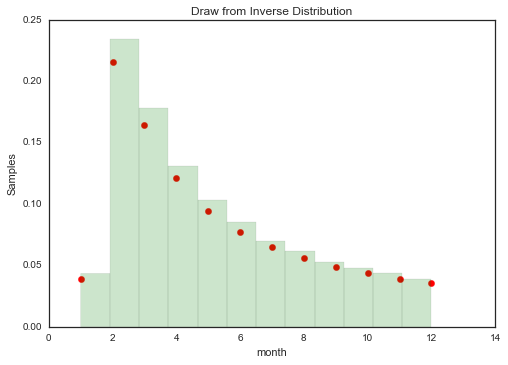

In [44]:
#here I finish the rest of inverse function sampling 
%time
R = np.random.uniform(0,1,N)
X = np.zeros(N)
#find their inverse cdf 
for index in range(N):
    diff = 9999#here is a large number
    month = 0
    for month_ind in range(12):
        if(cdf[month_ind] > R[index]):#if any cdf[x] is larger
            if(diff > cdf[month_ind] - R[index]):#find a closer element
                diff = cdf[month_ind] - R[index]
                month = month_ind + 1 #offset of index and month
    #here store the result 
    X[index] = month
# get the histogram info
# plot the histogram
plt.hist(X,alpha=0.2,bins = 12,color='g',normed=True);
plt.xlabel("month")
plt.ylabel("Samples")
plt.ylim(0,0.25)
plt.title("Draw from Inverse Distribution")
plt.scatter(np.arange(1,13),res,color='r',s=40)

### Conclusion
Judging by the time spent on both simulations, drawing from inverse function is faster than rejecting sampling, due to the fact the rejecting sampling's has a large envelope(there might be a large portion of samples get rejected), while inverse function is straightforward to calculate. 

A look-up table is more appropriate for discrete data while an analytical solution to the anti-derivative is stuitable for continuous data more. 

# Problem 5: Give it all!

Estimate the following integral:

$ \int_{-1}^{1} \int_{-1}^{1}  f(x,y) \,dx \,dy$, with 

$ g(x,y) = -(x+0.4)^2 - (y+0.4)^2 + 0.1 - (x-0.4)^2 - (y-0.4)^2 + 0.05$, and

$ f(x,y) = \max(g(x,y), 0)$


First use basic Monte Carlo estimation. Then apply different variance reduction techniques we discussed in the lecture: 
* stratified sampling, 
* control variates, 
* importance sampling

For each technique give a short explanation of how you are applying it to the problem. Implement the different techniques and then make a table and compare the results with respect to run-time and error in the estimate. 

You can choose to also either apply and explain antithetic variates, or explain why you don't think they are useful in this case, and how they could benefit of being combined with one of the techniques listed above. 

**Please answer this problem by adding cells here.**

In [45]:
#define two functions
def g1(x,y):
    return -(x+0.4)**2-(y+0.4)**2+0.1;
def g2(x,y):
    return -(x-0.4)**2-(y-0.4)**2+0.05;
def f(g1,g2,x,y):
    inter = g1(x,y)
    inter2= g2(x,y)
    return np.maximum(inter,0) + np.maximum(inter2,0)

In [69]:
#The first one, apply MC
%time
estimates = np.zeros(500)
for index in range(500):
    N = 10000
    z = np.zeros(N)
    for i in range(N):
        x = np.random.uniform(low=-1,high=1)
        y = np.random.uniform(low=-1,high=1)
        z[i]= f(g1,g2,x,y)
    estimates[index] = np.mean(z) * 4
print "Monte Carlo Estimate = ", np.mean(estimates)
print "Monte Carlo Standard Deviation", np.std(estimates)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs
Monte Carlo Estimate =  0.0196573165536
Monte Carlo Standard Deviation 0.000627742084335


### Stratification
Instead of taking N samples, drawn from uniform distribution, we break the interval into M strata of equal width and take L samples for each strate. In this case, we will make sure we sample from every part of graph. Intuitively, the expectation value won't change, and based on the theory of Cauchy-Schwarz Inequality, the variance will be reduced. 

As such, for this problem, I divided each axis(since we have two diminsions) by 10 parts. In total, I will get 100 small stratas in my function. For each strata, I took 100 samples, which makes the total number of samples go up to 10000. 

In [68]:
N = 10000
M = 10 # I have 100 stratas/each axis is 10
xmin = -1.0
xmax = 1.0
step = (xmax - xmin)/M

#in each strata(x,y), we need to draw uniform distribution
#loop every strata
#there are M stratas
%time
estimates_stra = np.zeros(500)
for reg in range(500):
    x_umin= -1.0
    y_umin=-1.0
    y_umax = -0.8
    x_umax = -0.8
    z_strata = np.zeros(M * M)#here I store each expectation value, shall have 100 stratas
    index = 0
    for i in range(M):
        y_umin = -1.0
        y_umax = -0.8
        for j in range(M):
            #each strata samples 100
            z = np.zeros(N/(M*M))
            count = 0
            for ind in range(100):
                count += 1
                #within each strata, sample n/m times, and get a mean value 
                x = np.random.uniform(low=x_umin,high=x_umax)
                y = np.random.uniform(low=y_umin,high=y_umax)
                z[ind] = f(g1,g2,x,y)  
            z_strata[index] = np.mean(z) * 0.04;
            index += 1  
            y_umin += step
            y_umax += step
        x_umin += step
        x_umax += step
    #then we get a z_strata
    estimates_stra[reg] = np.sum(z_strata)
print "Stratified Monte Carlo Estimate = ", np.mean(estimates_stra)
print "Stratified Monte Carlo Std = ", np.std(estimates_stra)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs
Stratified Monte Carlo Estimate =  0.0196245094001
Stratified Monte Carlo Std =  0.000262766953303


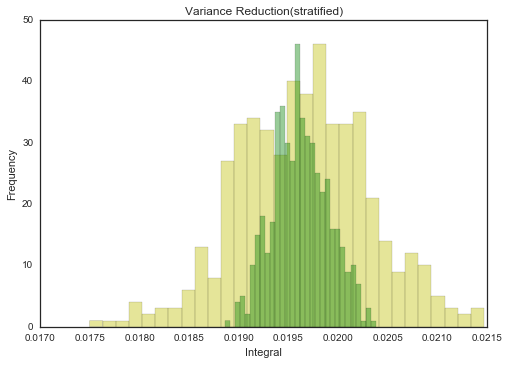

In [50]:
#let me plot two plots above to observe the variance change
ax = sns.distplot(estimates,color='y',kde= False,bins=30)
sns.distplot(estimates_stra,color='g',kde=False,bins=30)
ax.set(xlabel='Integral', ylabel='Frequency',title='Variance Reduction(stratified)')

### Control Variates

The whole idea of having control variates is to transform the function needed to integrate to another function having the same expected values but smaller variances. 

In this problem, I plot the contour plots of original functions. After that I found two Gaussian functions.

Foray into multiple control variates

The first thought I had was to use multiple Gaussian distributions. By doing in this way, I believe the variance of the final results shall decrease insignificantly. However, later on, the complexity of this approach increases a lot. In the interest of time, I decided to give up this approach, unfortunately.

Final Approach: I decided to add two Gaussian, g1,g2 into one function, g. In this case, later on, when I calculate b, my life would be easier, as a single b value could be calculated by having covrariance value divided by a variance of g(x). This approach didn't reduce my variance much though. 


Before I move on, one countour plot of the original function is very useful for me to pick a g(x) and also for the future important sampling

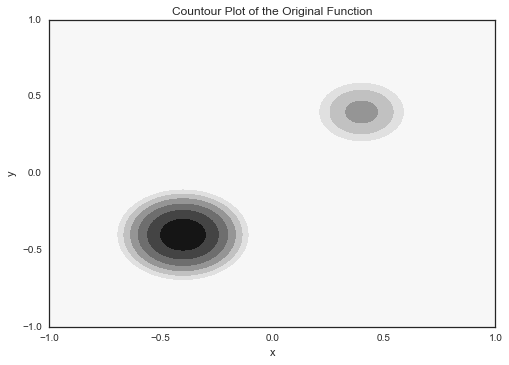

In [51]:
x_points = np.linspace(-1,1,1000)
y_points = np.linspace(-1,1,1000)
xx, yy = np.meshgrid(x_points,y_points)
z_res = f(g1,g2,xx,yy)
plt.contourf(xx,yy,z_res)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Countour Plot of the Original Function")

(200, 200, 2)


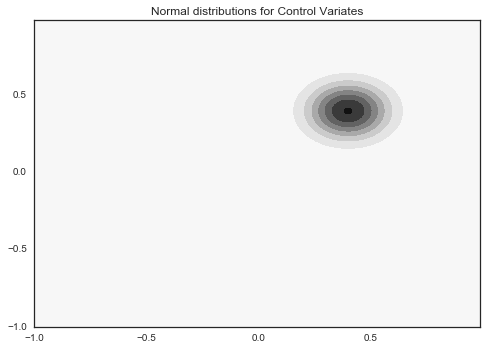

In [52]:
#here I have a new normal distribution
from scipy.stats import multivariate_normal
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
print pos.shape
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([-0.4, -0.5], [[0.028, 0], [0, 0.028]])
rv2 = multivariate_normal([0.4, 0.4], [[0.015, 0], [0, 0.015]])
plt.contourf(x, y, rv.pdf(pos))
plt.contourf(x, y, rv2.pdf(pos))
plt.title("Normal distributions for Control Variates")

In [53]:
#calculate tau
N = 10000
x = np.random.uniform(-1,1,N)
y = np.random.uniform(-1,1,N)
z = rv.pdf(zip(x,y)) + rv2.pdf(zip(x,y))
tau = np.mean(z)
print "The expectation value of Normals:", tau

The expectation value of Normals: 0.493506814201


In [64]:
#From the previous section, I found the normal distributions
#Here is the control variates part
#Here I have two Normal Distribution,and cover the two countours above
#draw two uniform distributions
estimates_control = np.zeros(500)
%time
for index in range(500):
    N = 10000
    #########################
    x = np.random.uniform(-1,1,N)
    y = np.random.uniform(-1,1,N)
    z = f(g1,g2,x,y)
    RV = rv.pdf(zip(x,y)) + rv2.pdf(zip(x,y))
    b = -(np.cov(z,RV)[0,1])/(np.var(RV))
    estimates_control[index] = 4*(np.mean(z) + b*np.mean(RV) - b * tau)
print "The control variates estimate is:", np.mean(estimates_control)
print "The control variates standatd deviation is:",np.std(estimates_control)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.01 µs
The control variates estimate is: 0.019447615033
The control variates standatd deviation is: 0.000439099227968


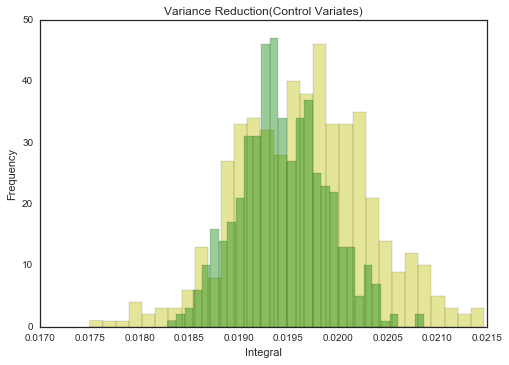

In [65]:
#let's plot this again! 
ax = sns.distplot(estimates,color='y',kde=False, bins=30)
sns.distplot(estimates_control,color='g',kde=False, bins=30)
ax.set(xlabel='Integral', ylabel='Frequency',title='Variance Reduction(Control Variates)')

### Important Sampling 

Often the integrand has a very small value on a dominant fraction of the whole integration volume. If the points are chosen evenly in the integration volume, the small minority of the points close to the `peak' give the dominant contribution to the integral.

Importance sampling: choose the random points so that more points are chosen around the peak, less where the integrand is small.

In this problem, similar to previous section, I chose two Gaussians, normalize them, and add them up. 




In [70]:
#I have two Gaussian I can take samples from (rv and rv2),each Gaussian, I draw 10000
import scipy as sp
low_bd = -1
high_bd = 1
N = 5000
rv = multivariate_normal([-0.4, -0.5], [[0.028, 0], [0, 0.028]])
rv2 = multivariate_normal([0.4, 0.4], [[0.015, 0], [0, 0.015]])
mvn_cdf = sp.stats.mvn.mvnun([-1,-1], [1,1],np.array([-0.4, -0.5]), ([0.028, 0], [0, 0.028]))[0]
mvn_cdf2 = sp.stats.mvn.mvnun([-1,-1],[1,1],np.array([0.4, 0.4]), ([0.015, 0], [0, 0.015]))[0]
normal_factor1 = 1/mvn_cdf
normal_factor2 = 1/mvn_cdf2
print mvn_cdf,mvn_cdf2
estimates_imp = np.zeros(500)
%time
for index in range(500):
    sam1 = rv.rvs(N)
    sam2 = rv2.rvs(N)
    #Make sure all those samples are within our integral range
    sam1 = sam1[((sam1[:,0]) < high_bd) & ((sam1[:,0]) > low_bd) & ((sam1[:,1]) > low_bd) & ((sam1[:,1]) < high_bd)]
    sam2 = sam2[((sam2[:,0]) < high_bd) & ((sam2[:,0]) > low_bd) & ((sam2[:,1]) > low_bd) & ((sam2[:,1]) < high_bd)]
    #Here we need to normalize both gaussian 
    #start computing 
    F1 = f(g1,g2,sam1[:,0],sam1[:,1])
    F2 = f(g1,g2,sam2[:,0],sam2[:,1])
    P1 = rv.pdf(sam1)
    P2 = rv2.pdf(sam2)
    #Then we calculate each expectation value, and sum them up
    E1 = np.mean(F1/P1) * normal_factor1
    E2 = np.mean(F2/P2) * normal_factor2
    estimates_imp[index] = E1 + E2
print "The important sampling estimate is:", np.mean(estimates_imp)
print "The important sampling Std is:", np.std(estimates_imp)

0.998428419977 0.999999036643
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs
The important sampling estimate is: 0.0196936410384
The important sampling Std is: 0.000184564952271


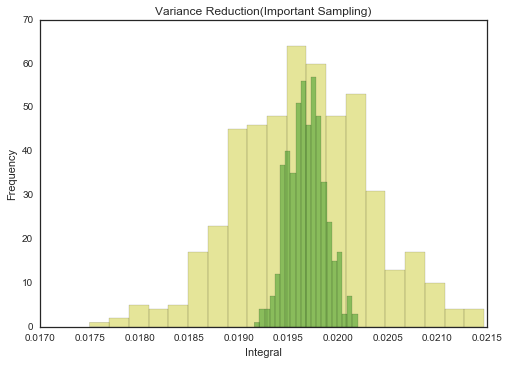

In [59]:
#let's plot this again! Almost there to observe the variance
ax = sns.distplot(estimates,color='y', bins=20, kde=False,)
sns.distplot(estimates_imp,color='g', bins=20, kde=False,)
ax.set(xlabel='Integral', ylabel='Frequency',title='Variance Reduction(Important Sampling)')

### Antithetic Variates plus Stratification

Antithetic Variates is also another very efficient variance reduction method. However, one condition of using this is the function has to be monotonic. This restricts the advantage of Antithetic Variates.

However, we could still take advantage of it by having function stratified first. As such, in each small stratified, we would be able to find antithetic variates. I used this method in this problem. 

It is hard to observe the function's monotonical property here. As such, I stratify them into very small stratas(400 of stratas), and then to find antithetic variates. 

Although there is small chance that the function within my small strata is still not a monotonic one, but those small part of stratas wouldn't affect my results much. Actually, this method creates a very good result. 

In [62]:
#within each strata, sample n/m times, and get a mean value 
N = 10000
M = 20 #so, make it to 20 each axises, then the total would be 400 
xmin = -1.0
xmax = 1.0
step = (xmax - xmin)/M
#############################
%time
estimates_anti = np.zeros(500)
for index in range(500):
    x_umin= -1.0
    y_umin=-1.0
    y_umax = -0.9
    x_umax = -0.9
    z_strata = np.zeros(400)
    count = 0
    for i in range(M):
        y_umin = -1.0
        y_umax = -0.9
        for j in range(M):
            x = np.random.uniform(low=x_umin,high=x_umax,size = 25)
            y = np.random.uniform(low=y_umin,high=y_umax,size = 25)
            x2 = (x_umax - x) + x_umin
            y2 = (y_umax - y) + y_umin
            z1 = f(g1,g2,x,y)
            z2 = f(g1,g2,x2,y2)
            z_strata[count] = ((np.mean(z1) + np.mean(z2))/2) * (step*step)
            y_umin += step
            y_umax += step
            count += 1
        x_umin += step
        x_umax += step
    estimates_anti[index] = np.sum(z_strata)
print "The Antithetic Methods Expected Value is:", np.mean(estimates_anti)
print "The Antithetic Standard Deviation is:",np.std(estimates_anti)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs
The Antithetic Methods Expected Value is: 0.0196374928967
The Antithetic Standard Deviation is: 2.63657549119e-05


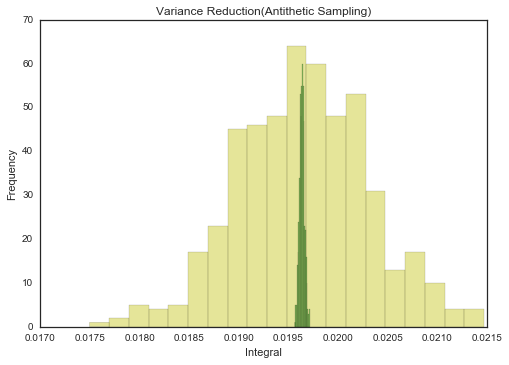

In [63]:
ax = sns.distplot(estimates,color='y', bins=20, kde=False,)
sns.distplot(estimates_anti,color='g', bins=20, kde=False,)
ax.set(xlabel='Integral', ylabel='Frequency',title='Variance Reduction(Antithetic Sampling)')

### Conclusion

Having already discussed in great details about the results(benefits and pitfalls) associated with each technical variance reduction methods, I can now make a holistic judgement about the relative success of each method.

Antithetic Variates(with stratification) works the best in this homework, with only 2.63e-05 standard deviation. It costs 6.9 $\mu$s. The reason why this is the case, I believe, is it has the advantages of both methods. Compared to methods below, it reached number of maginitude decrease on variance. 

Important samplig also did a good job with 1.8e-04 standard deviation. The time spent was 5.0 $\mu$ s. It is not surprising important sampling has this good result, as it has more sample on peak values, which dominant overall expected values. 

Control Variates:  4.2e-04 standard deviation, with time spent 5.01 $\mu$ s. I think the benefits of control variates largely depends on the g(x) people chose. So, in my case, this method doesn't reach its optimal result

Stratification did a decent job with 2e-04, with time spent 5.01 $\mu$ s



| Methods                       | Time($\mu$s) | Expected Value | Variance |
|-------------------------------|--------------|----------------|----------|
| Normal MC                     | 5.01         | 0.01964        | 6.2e-04   |
| Stratification                | 5.01         | 0.01962        | 2.0e-04    |
| Control Variates              | 5.01         | 0.01944        | 4.2e-04  |
| Important Sampling            | 5.01         | 0.01969        | 1.8e-04  |
| Antithetic(w. Stratification) | 6.9          | 0.01963        | 2.6e-05 |